In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st

Description of notebook
why the tests repeated 
what had changed 
summary of results
inspect last snapshot and events that stand out in kurtosis after filtering?

In [2]:

fbins=np.linspace(0,197/2,int(1+4096/2))
timebins = (1/60)*np.asarray(range(719))

Things to come back too:

What's going on in last snapshot? Is it the ~200 kHz? Will smoothing make that more evident?

## Inspect the first and last snapshots in the scan

In [3]:
snapshot=np.load("snapshots/overnight_scan_9-29-2021/single_board_snapshot1632893922.134754.npy")

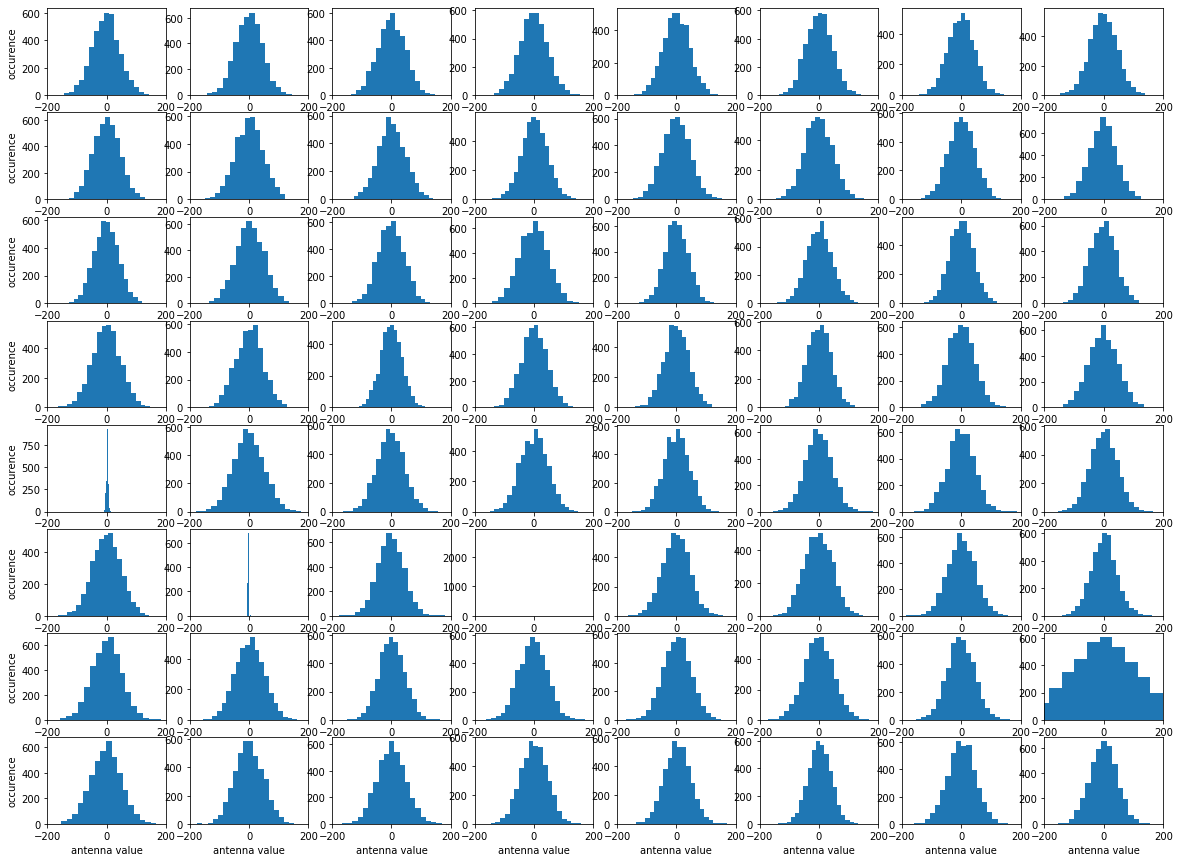

In [4]:
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

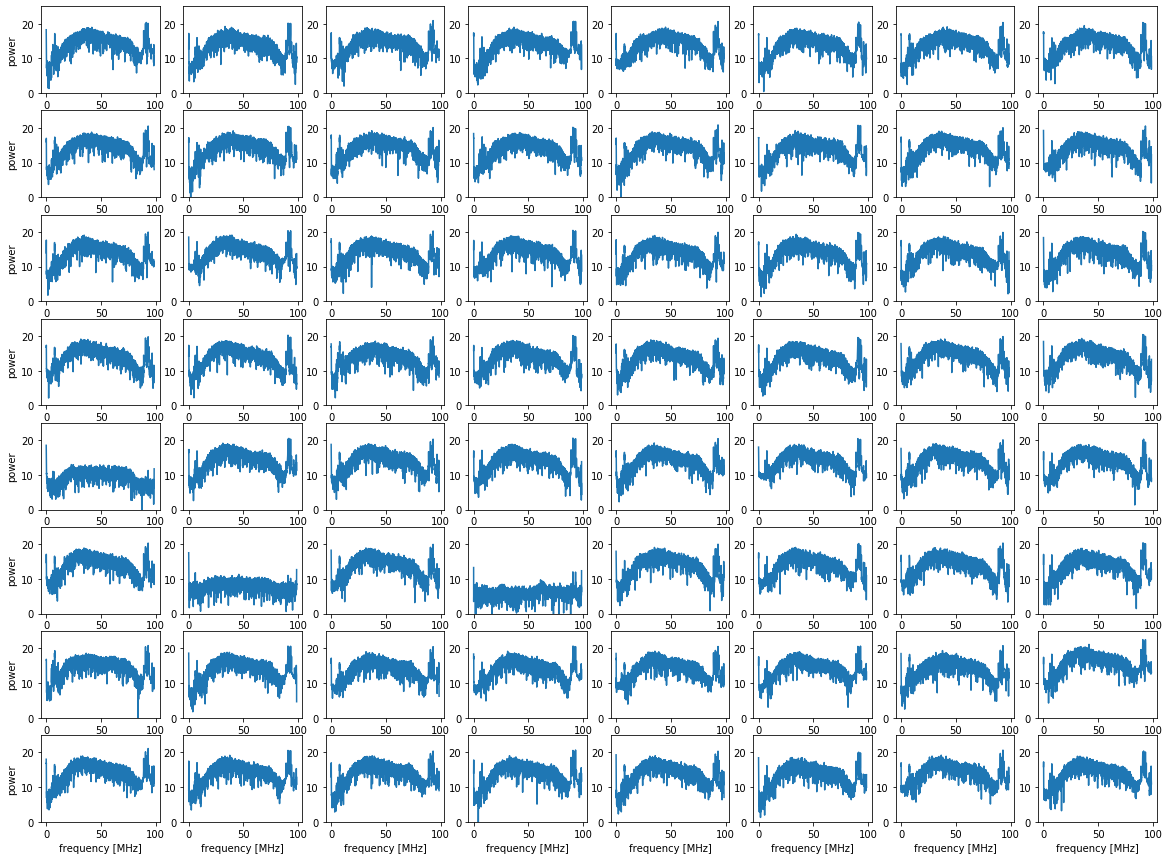

In [5]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

### Last snapshot
Several antennas in this last snapshot have weird double-peaked histograms.

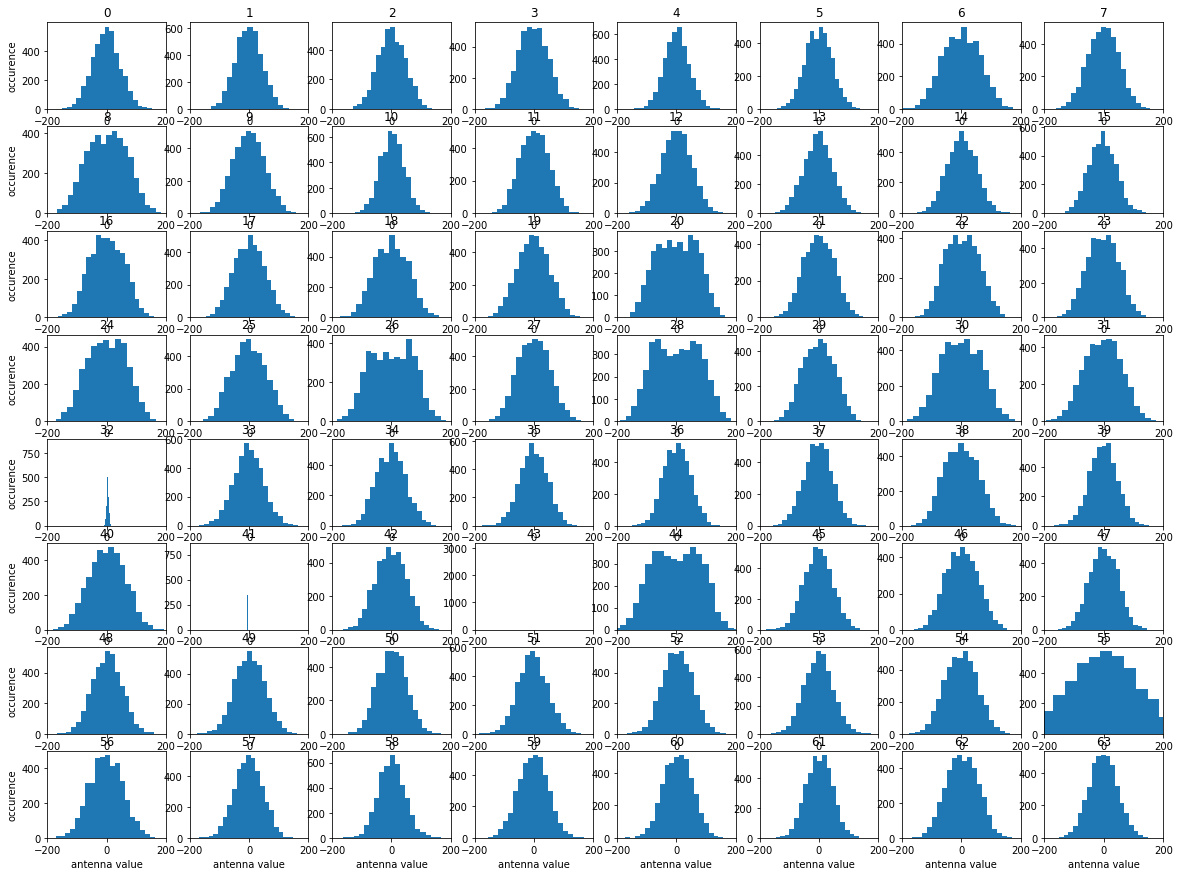

In [6]:
snapshot=np.load("snapshots/overnight_scan_9-29-2021/single_board_snapshot1632937783.1049712.npy")
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

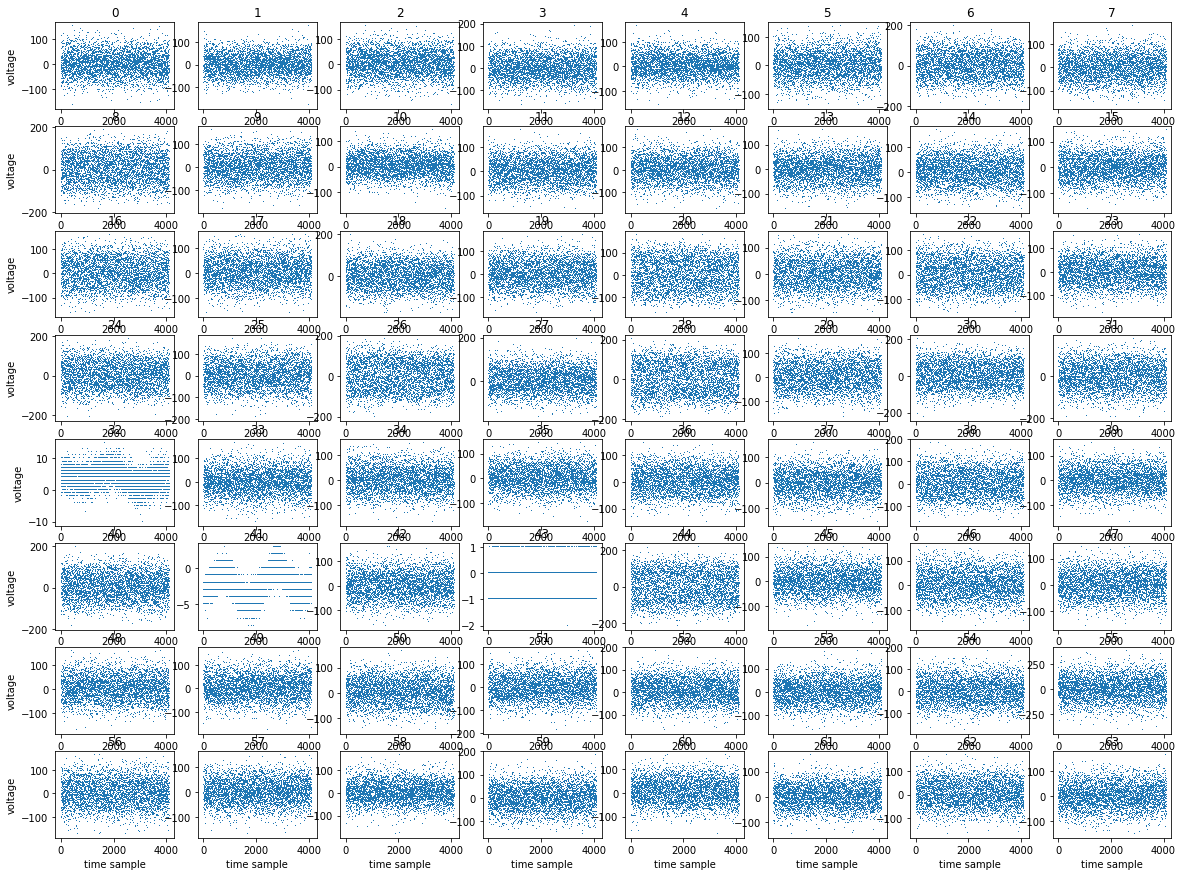

In [10]:
snapshot=np.load("snapshots/overnight_scan_9-29-2021/single_board_snapshot1632937783.1049712.npy")
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.plot(snapshot[:,i+4],',')
    if i > 55:
        plt.xlabel('time sample')
    if i%8==0:
        plt.ylabel('voltage')

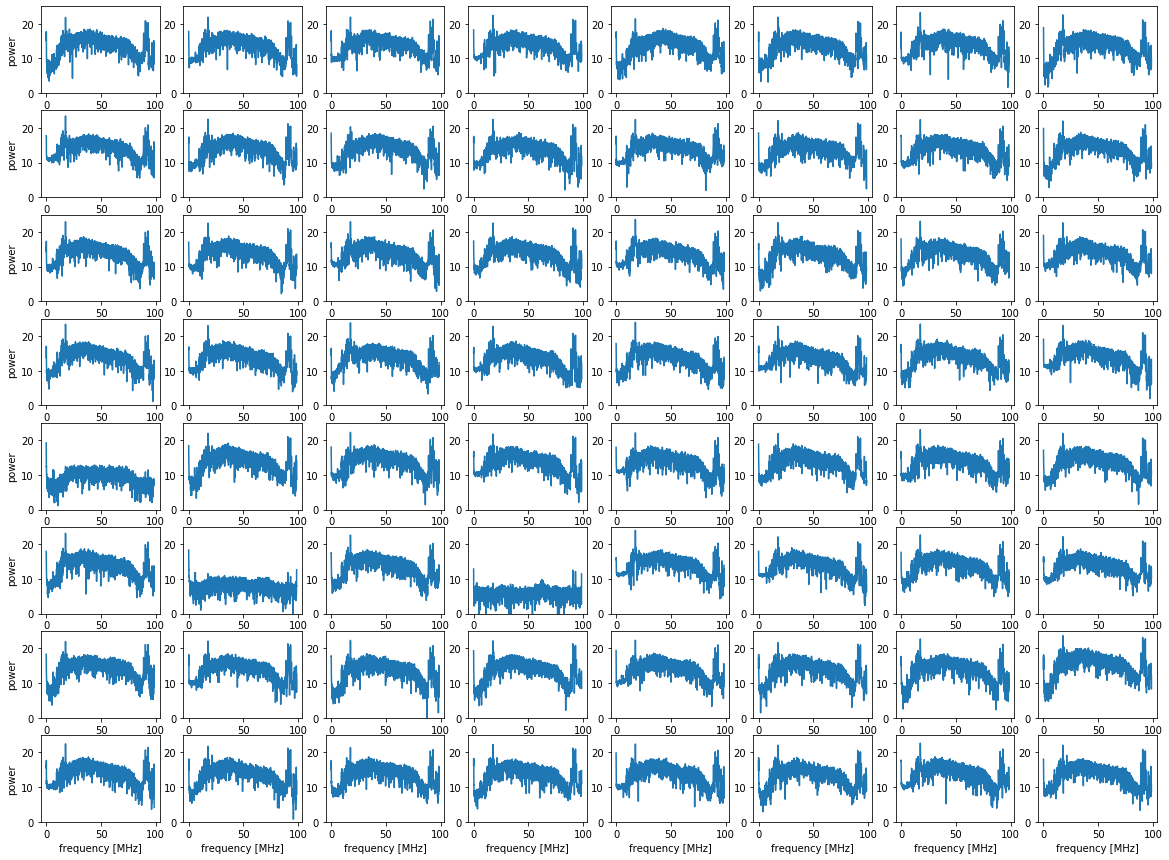

In [11]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Waterfall plots

In [12]:
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()

In [17]:
Nchan=2049
Nant = 64
Nsnapshot = 719


dynamicspectra=np.zeros((Nchan,Nsnapshot,Nant))
maxtimeseries =np.zeros((Nsnapshot,Nant))
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
    for i in range(Nant):
        timeseries = snapshot[:,i+4]
        maxtimeseries[j,i]=np.max(np.abs(timeseries))
        spec=np.fft.rfft(timeseries)
        logpower = np.log(np.square(np.abs(spec)))
        dynamicspectra[:,j,i] = logpower


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


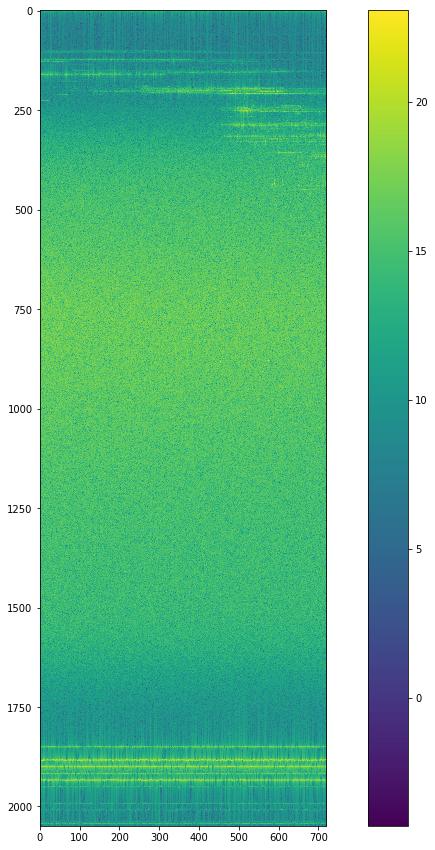

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,0],interpolation='None')
plt.colorbar()

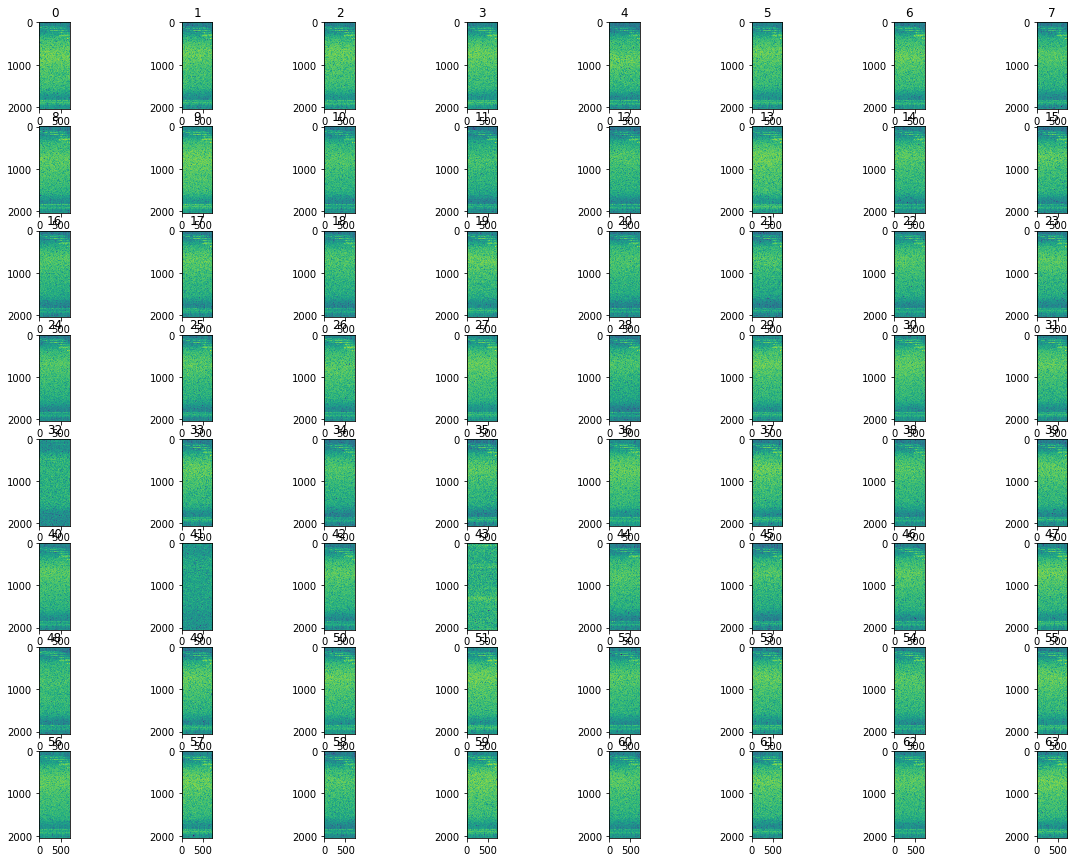

In [19]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.imshow(dynamicspectra[:,:,i],interpolation='None')
    plt.title(i)

plt.show()
    
    

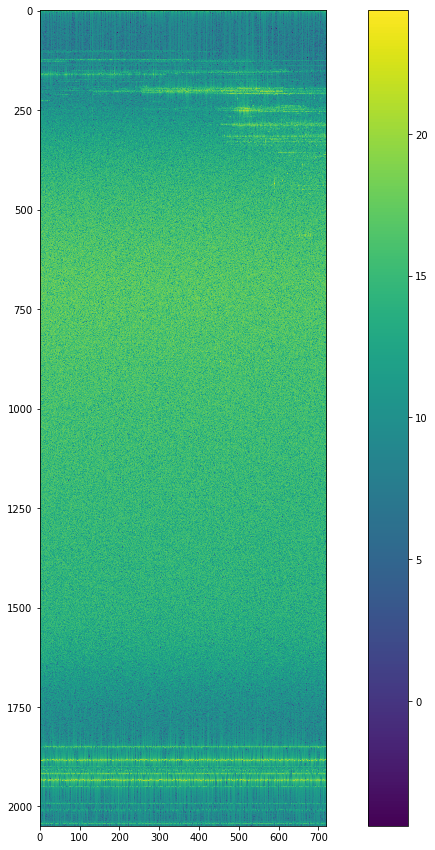

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,60],interpolation='None')
plt.colorbar()

### work on time axis label

In [23]:
print( fnames[0])
fname0=fnames[0]

single_board_snapshot1632893922.134754.npy



In [25]:
name=fname0
t=float(name[-22:-5])
utcstruct=time.gmtime(t)
print(time.asctime(utcstruct))
print(utcstruct)

Wed Sep 29 05:38:42 2021
time.struct_time(tm_year=2021, tm_mon=9, tm_mday=29, tm_hour=5, tm_min=38, tm_sec=42, tm_wday=2, tm_yday=272, tm_isdst=0)


Pacific time is UTC - 7.   Start time was 10:38 p.m. = 82 minutes before midnight

In [26]:
timesteps = np.asarray(range(Nsnapshot))
minutes_since_midnight = timesteps - 82
hours_since_midnight = (1/60)*minutes_since_midnight

## Timeseries standard deviation over time

In [28]:
Nant = 64


sdevs=np.zeros((Nsnapshot,Nant))
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
    for i in range(Nant):
        sdevs[j,i]=np.std(snapshot[:,i+4])
     

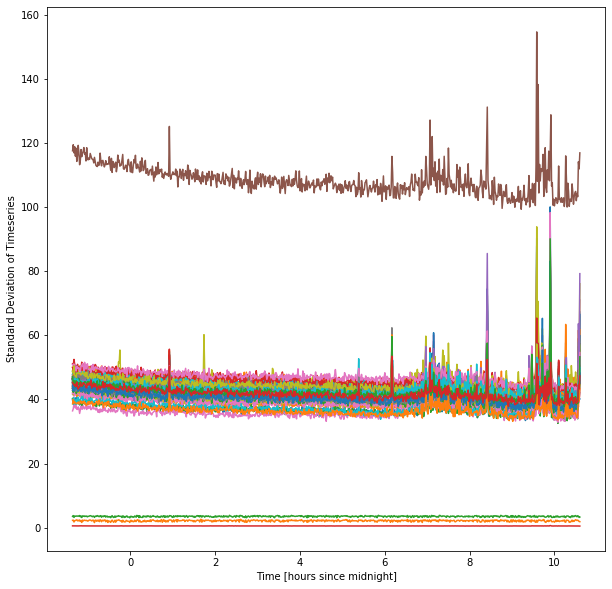

In [30]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(hours_since_midnight,sdevs[:,i])
    plt.xlabel("Time [hours since midnight]")
    plt.ylabel("Standard Deviation of Timeseries")
plt.show()

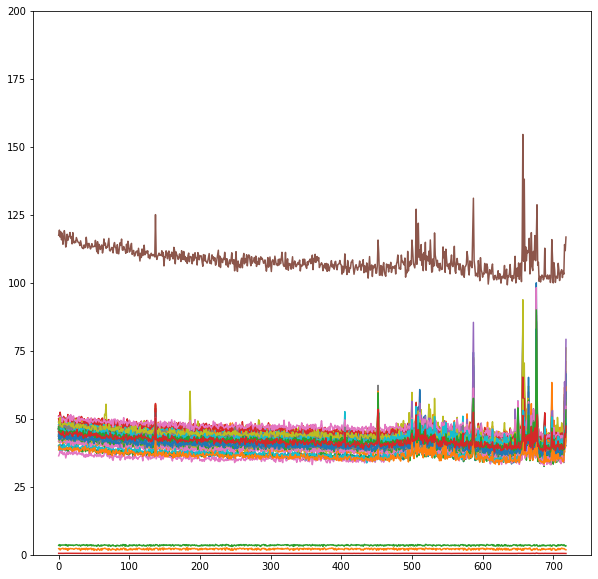

In [31]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(sdevs[:,i])
    plt.ylim(0,200)
plt.show()

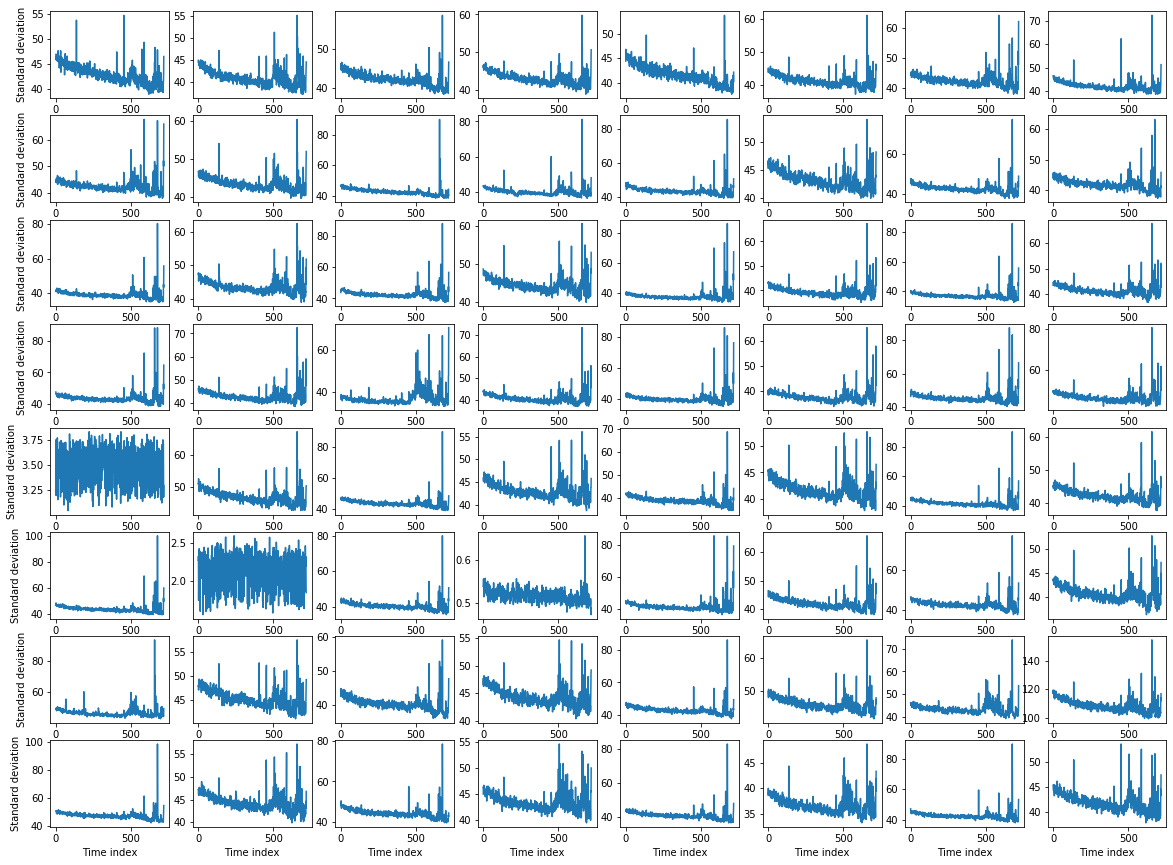

In [33]:
#Y axis is limited to show detail
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(sdevs[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Standard deviation')

## Kurtosis
Fourth moment divided by variance squared.  Scipy is using Fisher definition which then subtracts 3, such that the result is zero for a Gaussian distribution.

In [34]:
kurtosis=np.zeros((Nsnapshot,Nant))
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
    for i in range(Nant):
        kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

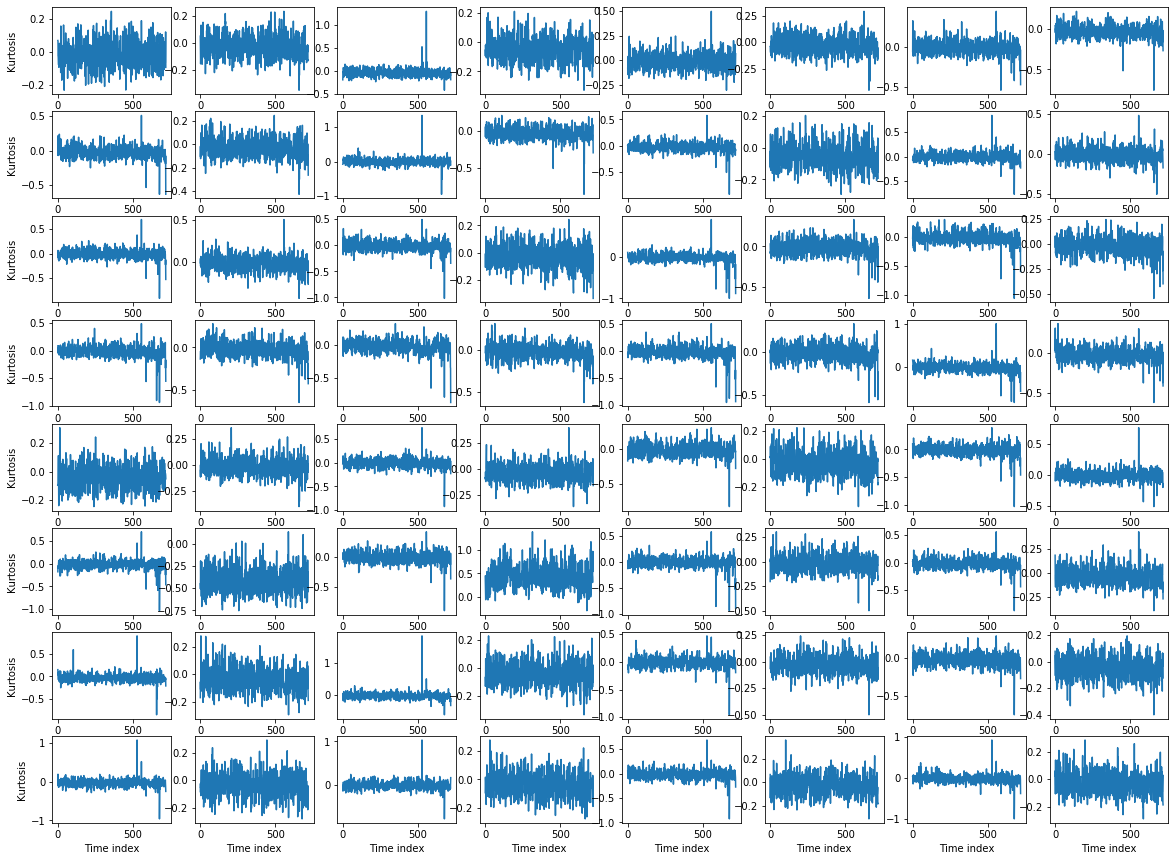

In [35]:
#plt.figure(figsize=(10,10))
#for i in range(64):
#    plt.plot(kurtosis[:,i])
#plt.show()

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(kurtosis[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Kurtosis')

## Skewness

In [37]:
skewness=np.zeros((Nsnapshot,Nant))
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
    for i in range(Nant):
        skewness[j,i]=st.skew(snapshot[:,i+4])

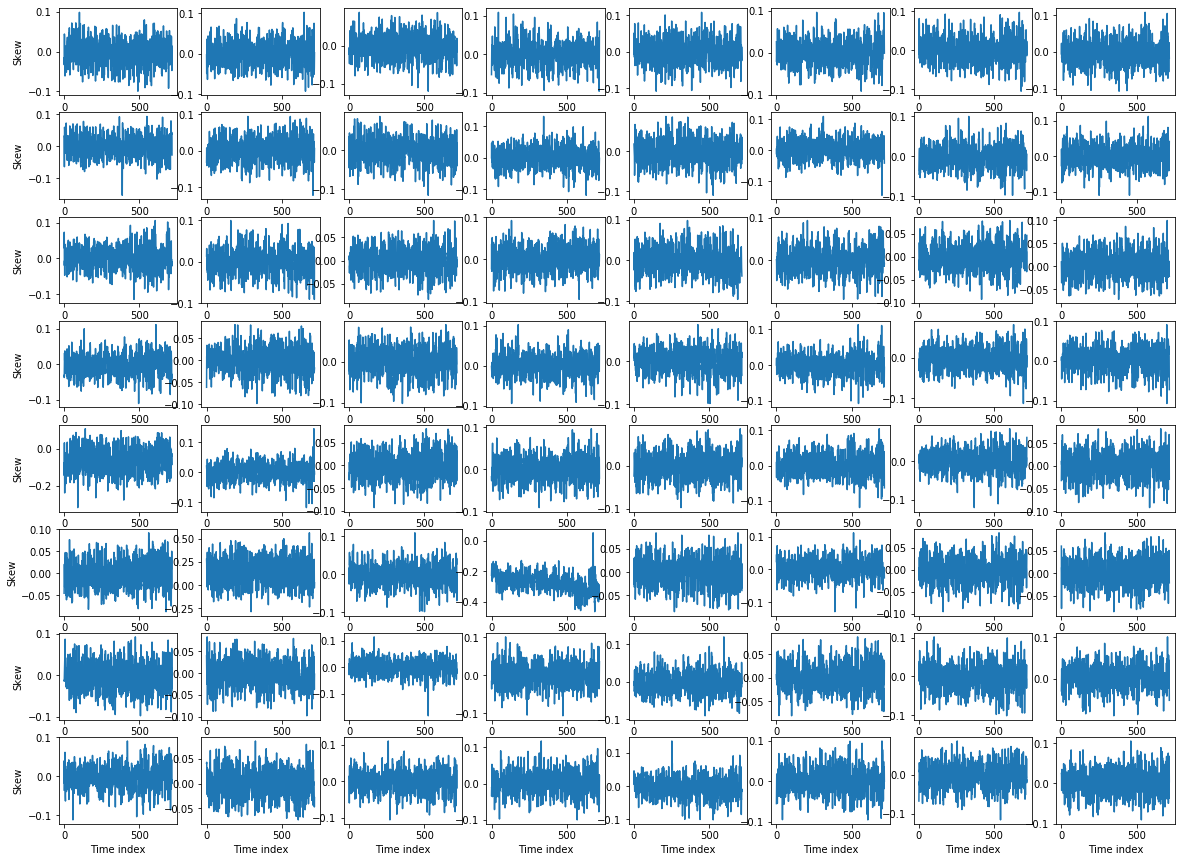

In [38]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(skewness[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Skew')

No longer have one antenna standing out for kurtosis.

## Examine antenna 11, which stood out in skewness and kurtosis plots last time:

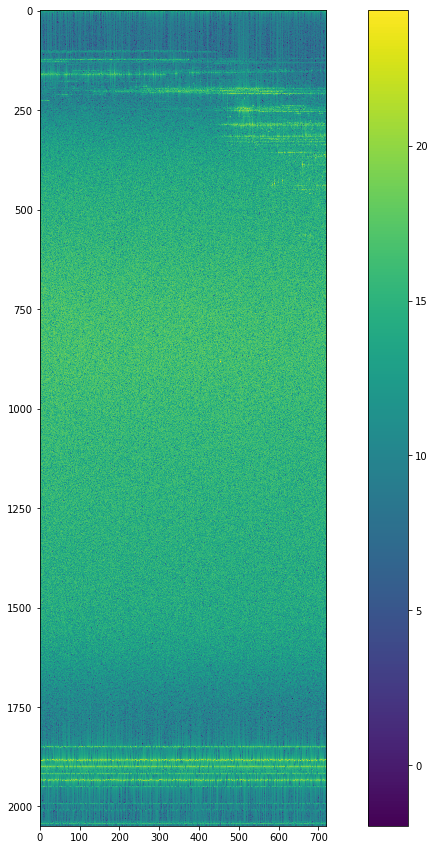

In [39]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,11],interpolation='None')
plt.colorbar()

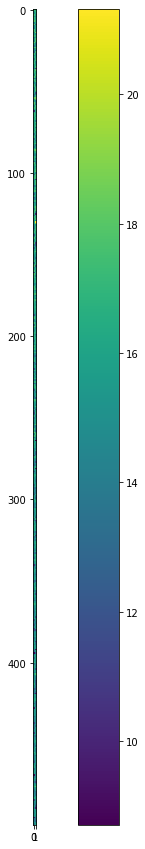

In [54]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[750:1250,404:406,13],interpolation='None')
plt.colorbar()


1883
167.0


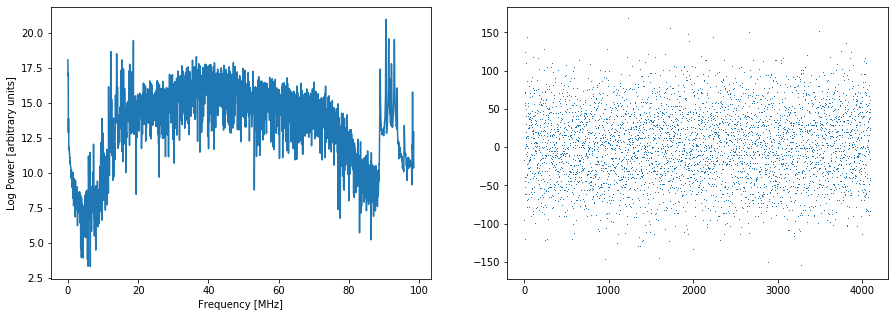

In [63]:
antennaindex=11

#a normal time
timeindex=700
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Log Power [arbitrary units]")
plt.plot(fbins,dynamicspectra[:,timeindex,antennaindex])
print(np.argmax(dynamicspectra[:,timeindex,antennaindex]))
plt.subplot(122)
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
plt.plot(snapshot[:,antennaindex+4],',')
print(np.max(np.abs(snapshot[:,antennaindex+4])))

#a bad time



How often are there saturated snapshots?

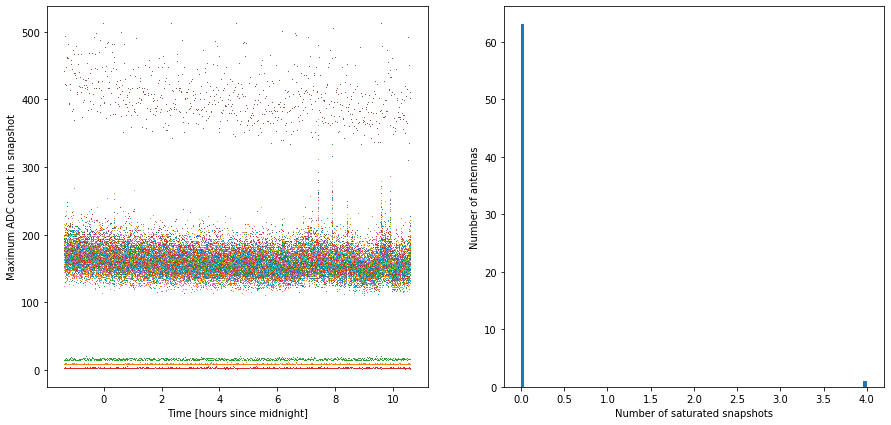

In [64]:
plt.figure(figsize=(15,7))

saturation=[]
plt.subplot(121)
plt.ylabel("Maximum ADC count in snapshot")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,maxtimeseries[:,i],',')
    countsat=0
    for j in range(len(maxtimeseries)):
        if maxtimeseries[j,i]>=511:
            countsat+=1
    saturation.append(countsat)

    
plt.subplot(122)
plt.hist(saturation,100)
plt.xlabel("Number of saturated snapshots")
plt.ylabel("Number of antennas")
plt.show()
    

In [62]:
print(saturation[11])
print(saturation[55])

0
4


Now only the antenna with large gain saturated, and only 4 times.

In [31]:
#This snapshot was recorded sending a constant for each timeseries.  
#I can use this to look up which order the antennas are in
#indexsnapshot = np.load("snapshots/single_board_snapshot1631823914.5523858.npy")
#for antennaindex in [11, 55, 60, 32, 41, 43]:
#    print(antennaindex, indexsnapshot[0,antennaindex+4])



11 4.0
55 56.0
60 51.0
32 47.0
41 38.0
43 36.0


## Filter

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


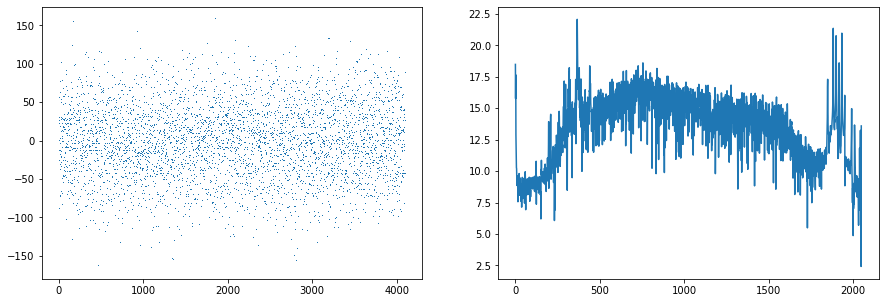

In [65]:
#start with a normal time and antenna
timeindex=700
antennaindex=13
plt.figure(figsize=(15,5))

plt.subplot(121)
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
timeseries=snapshot[:,antennaindex+4]
plt.plot(timeseries,',')

plt.subplot(122)
spectrum=np.fft.rfft(timeseries)
plt.plot(np.log(np.square(spectrum)))

#

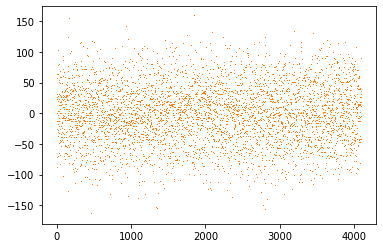

In [66]:
spectrum=np.fft.rfft(timeseries)
plt.plot(timeseries,',')
rtimeseries=np.fft.irfft(spectrum)
plt.plot(rtimeseries,',')

Filter from 21.64306640625 to 81.7626953125MHz


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


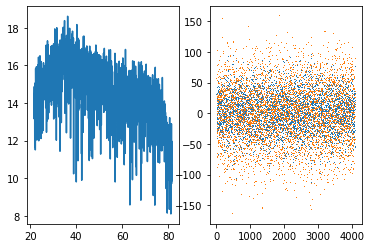

In [67]:
fbins=np.linspace(0,197/2,int(1+4096/2))
print("Filter from " + str(fbins[450]) + ' to ' + str(fbins[1700]) + "MHz" )
tophat=np.zeros(len(spectrum))
tophat[450:1700] = 1
filteredspectrum=tophat*spectrum
filteredtimeseries=np.fft.irfft(filteredspectrum)


plt.figure()
plt.subplot(121)
plt.plot(fbins,np.log(np.square(filteredspectrum)))

plt.subplot(122)
plt.plot(filteredtimeseries,',')
plt.plot(timeseries,',')



In [69]:
Nchan=2049
Nant = 64
Nsnapshot = 719


fsdevs=np.zeros((Nsnapshot,Nant))
fskewness=np.zeros((Nsnapshot,Nant))
fkurtosis=np.zeros((Nsnapshot,Nant))
with open("overnight_scan_9-29-2021_ls.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/overnight_scan_9-29-2021/"+fname)
    for i in range(Nant):
        timeseries=snapshot[:,i+4]
        spectrum=np.fft.rfft(timeseries)
        filteredspectrum=tophat*spectrum
        filteredtimeseries=np.fft.irfft(filteredspectrum)
        fsdevs[j,i]=np.std(filteredtimeseries)
        fskewness[j,i]=st.skew(filteredtimeseries)
        fkurtosis[j,i]=st.kurtosis(filteredtimeseries)

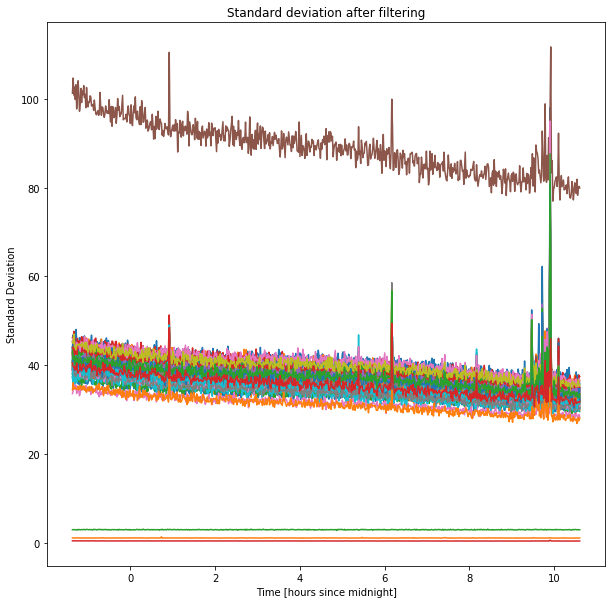

In [70]:
plt.figure(figsize=(10,10))
plt.title("Standard deviation after filtering")
for i in range(64):
    plt.plot(hours_since_midnight,fsdevs[:,i])
    plt.ylabel("Standard Deviation")
    plt.xlabel("Time [hours since midnight]")
plt.show()


Antenna index 60 (241B) behaves normally now.

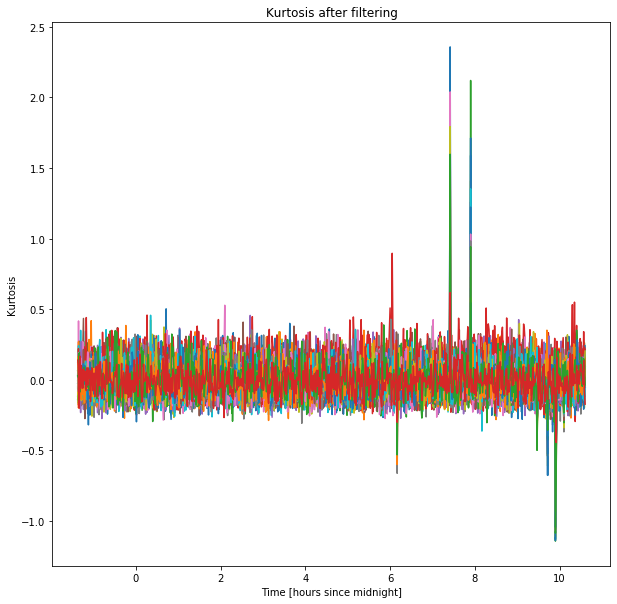

In [73]:
plt.figure(figsize=(10,10))
plt.title("Kurtosis after filtering")
plt.ylabel("Kurtosis")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,fkurtosis[:,i])
    
plt.show()

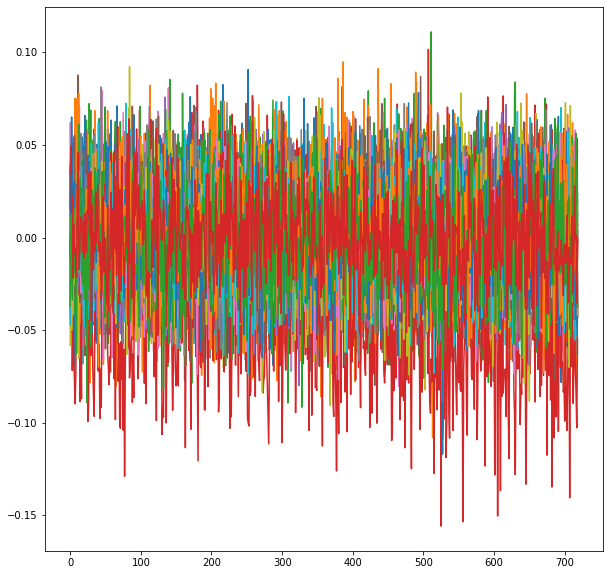

In [74]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(fskewness[:,i])
plt.show()

## Look for sawtooth pattern Marin observed with AC -- Not repeated here, see 24 hour notebook.